In [132]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.layers import Conv1D, Conv2D, MaxPooling2D, Flatten, Dense, RepeatVector

In [133]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [134]:
# 2. Đọc file csv và gắng index với giá Close
file_path = "/content/drive/MyDrive/crt/CMGGRU.csv"
data = pd.read_csv(file_path)
data

,Date,Price
0,15/12/2023,39000.0
1,14/12/2023,38900.0
2,13/12/2023,38900.0
3,12/12/2023,39000.0
4,11/12/2023,38850.0
...,...,...
1739,23/12/2016,9321.7
1740,21/12/2016,9415.2
1741,19/12/2016,9352.8
1742,16/12/2016,9352.8


In [135]:
# Xử lý dữ liệu
prices = data['Price']

In [136]:
returns = 100 * data.Price.pct_change().dropna()

# Scale the prices using MinMaxScaler
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(data.Price.values.reshape(-1, 1))

Ratio 7-3


In [137]:
# Chia dữ liệu thành tập train test
np.random.seed(42)

train_size = int(len(scaled_prices) * 0.7)
test_size = int(len(scaled_prices) * 0.3)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [138]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [139]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [140]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [141]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [142]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [143]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
19/19 [==============================] - 3s 20ms/step - loss: 0.0861
Epoch 2/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0098
Epoch 3/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0048
Epoch 4/100
19/19 [==============================] - 0s 20ms/step - loss: 0.0031
Epoch 5/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0018
Epoch 6/100
19/19 [==============================] - 0s 19ms/step - loss: 9.9267e-04
Epoch 7/100
19/19 [==============================] - 0s 19ms/step - loss: 6.7338e-04
Epoch 8/100
19/19 [==============================] - 0s 25ms/step - loss: 5.8559e-04
Epoch 9/100
19/19 [==============================] - 1s 29ms/step - loss: 5.7318e-04
Epoch 10/100
19/19 [==============================] - 1s 30ms/step - loss: 5.5910e-04
Epoch 11/100
19/19 [==============================] - 1s 30ms/step - loss: 5.4461e-04
Epoch 12/100
19/19 [==============================] - 1s 29ms/step - loss: 5.3599e-

In [144]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

16/16 [==============================] - 1s 6ms/step
[[1745]
 [1746]
 [1747]
 [1748]
 [1749]
 [1750]
 [1751]
 [1752]
 [1753]
 [1754]
 [1755]
 [1756]
 [1757]
 [1758]
 [1759]
 [1760]
 [1761]
 [1762]
 [1763]
 [1764]
 [1765]
 [1766]
 [1767]
 [1768]
 [1769]
 [1770]
 [1771]
 [1772]
 [1773]
 [1774]]
1/1 [==============================] - 0s 26ms/step
[9328.112 9248.51  9302.776 9448.589 9569.965 9614.336 9742.316 9763.344
 9699.96  9558.07  9358.283 9128.075 9018.859 8991.996 9028.996 9061.004
 9083.436 9191.062 9232.358 9172.532 9249.909 9313.965 9353.088 9319.727
 9320.89  9348.053 9447.183 9415.513 9430.618 9411.499]


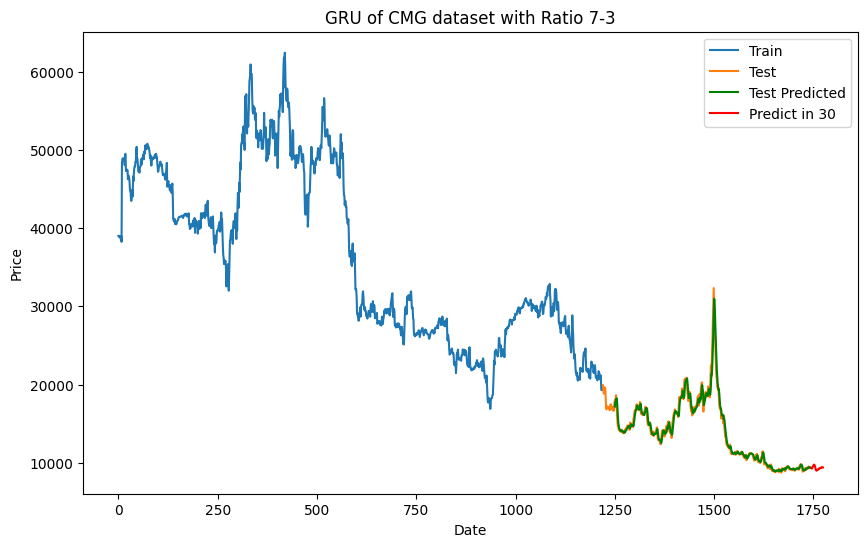

In [145]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GRU of CMG dataset with Ratio 7-3')
plt.legend()
plt.show()

In [146]:
# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_test=y_test.reshape(-1,1)
y_test
y_test= scaler.inverse_transform(y_test)
y_test
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error
# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

16/16 [==============================] - 0s 9ms/step


In [147]:
print('---------TEST----------')

print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))

#print("MSLE:", round(msle_test,3))
print('-------------------')


---------TEST----------
MAPE: 0.026
MAE: 398.191
RMSE: 648.597
-------------------


Ratio 8-2


In [148]:
# Chia dữ liệu thành tập train test
np.random.seed(42)

train_size = int(len(scaled_prices) * 0.8)
test_size = int(len(scaled_prices) * 0.2)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [149]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

In [150]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [151]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [152]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [153]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [154]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
22/22 [==============================] - 3s 21ms/step - loss: 0.0976
Epoch 2/100
22/22 [==============================] - 0s 23ms/step - loss: 0.0120
Epoch 3/100
22/22 [==============================] - 0s 21ms/step - loss: 0.0055
Epoch 4/100
22/22 [==============================] - 0s 22ms/step - loss: 0.0021
Epoch 5/100
22/22 [==============================] - 0s 22ms/step - loss: 7.6765e-04
Epoch 6/100
22/22 [==============================] - 0s 21ms/step - loss: 5.9925e-04
Epoch 7/100
22/22 [==============================] - 0s 19ms/step - loss: 5.7640e-04
Epoch 8/100
22/22 [==============================] - 0s 18ms/step - loss: 5.6481e-04
Epoch 9/100
22/22 [==============================] - 0s 19ms/step - loss: 5.4119e-04
Epoch 10/100
22/22 [==============================] - 0s 20ms/step - loss: 5.3580e-04
Epoch 11/100
22/22 [==============================] - 0s 19ms/step - loss: 5.3672e-04
Epoch 12/100
22/22 [==============================] - 0s 19ms/step - loss: 5.02

In [155]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

10/10 [==============================] - 1s 9ms/step
[[1745]
 [1746]
 [1747]
 [1748]
 [1749]
 [1750]
 [1751]
 [1752]
 [1753]
 [1754]
 [1755]
 [1756]
 [1757]
 [1758]
 [1759]
 [1760]
 [1761]
 [1762]
 [1763]
 [1764]
 [1765]
 [1766]
 [1767]
 [1768]
 [1769]
 [1770]
 [1771]
 [1772]
 [1773]
 [1774]]
1/1 [==============================] - 0s 34ms/step
[9223.189 9131.91  9196.196 9355.515 9477.084 9511.572 9645.002 9657.782
 9583.634 9432.564 9226.922 8994.53  8898.945 8884.931 8929.819 8960.196
 8978.109 9091.593 9127.122 9054.165 9142.499 9210.176 9247.158 9205.467
 9208.367 9240.148 9348.397 9305.476 9321.271 9300.093]


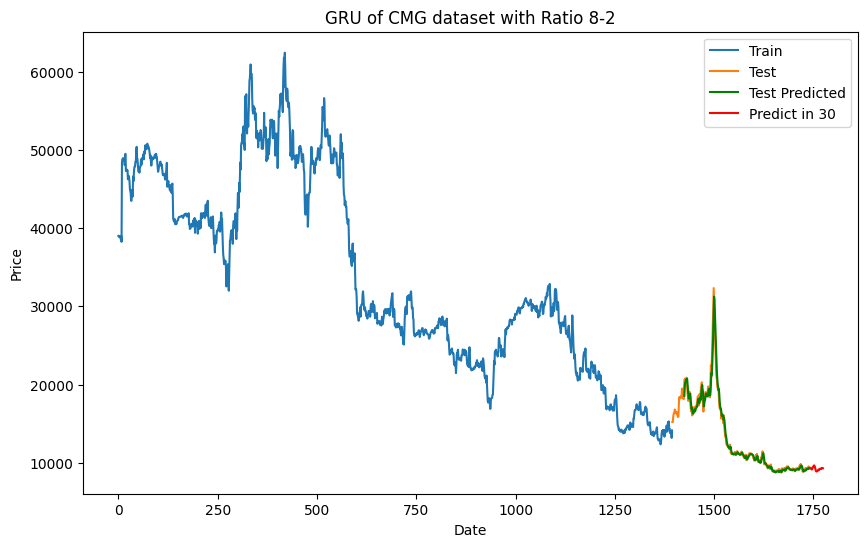

In [156]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GRU of CMG dataset with Ratio 8-2')
plt.legend()
plt.show()

In [157]:
# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_test=y_test.reshape(-1,1)
y_test
y_test= scaler.inverse_transform(y_test)
y_test
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error
# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

10/10 [==============================] - 0s 5ms/step


In [158]:

print('---------TEST----------')

print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))

#print("MSLE:", round(msle_test,3))
print('-------------------')

---------TEST----------
MAPE: 0.025
MAE: 395.413
RMSE: 674.194
-------------------


Ratio 9-1

In [159]:
# Chia dữ liệu thành tập train test
np.random.seed(42)

train_size = int(len(scaled_prices) * 0.9)
test_size = int(len(scaled_prices) * 0.1)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [160]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

In [161]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [162]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [163]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [164]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_steps, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [165]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100
25/25 [==============================] - 5s 25ms/step - loss: 0.0516
Epoch 2/100
25/25 [==============================] - 1s 21ms/step - loss: 0.0060
Epoch 3/100
25/25 [==============================] - 1s 22ms/step - loss: 0.0015
Epoch 4/100
25/25 [==============================] - 1s 22ms/step - loss: 6.1099e-04
Epoch 5/100
25/25 [==============================] - 1s 21ms/step - loss: 5.5430e-04
Epoch 6/100
25/25 [==============================] - 1s 21ms/step - loss: 5.2438e-04
Epoch 7/100
25/25 [==============================] - 1s 21ms/step - loss: 5.1341e-04
Epoch 8/100
25/25 [==============================] - 1s 21ms/step - loss: 4.9658e-04
Epoch 9/100
25/25 [==============================] - 1s 21ms/step - loss: 4.9078e-04
Epoch 10/100
25/25 [==============================] - 1s 21ms/step - loss: 4.6804e-04
Epoch 11/100
25/25 [==============================] - 1s 21ms/step - loss: 4.6254e-04
Epoch 12/100
25/25 [==============================] - 1s 22ms/step - loss: 

In [166]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

5/5 [==============================] - 0s 7ms/step
[[1745]
 [1746]
 [1747]
 [1748]
 [1749]
 [1750]
 [1751]
 [1752]
 [1753]
 [1754]
 [1755]
 [1756]
 [1757]
 [1758]
 [1759]
 [1760]
 [1761]
 [1762]
 [1763]
 [1764]
 [1765]
 [1766]
 [1767]
 [1768]
 [1769]
 [1770]
 [1771]
 [1772]
 [1773]
 [1774]]
1/1 [==============================] - 0s 26ms/step
[ 9607.373   9475.716   9576.098   9776.088   9895.248   9899.719
 10054.234  10037.183   9927.979   9745.921   9517.948   9274.055
  9219.591   9243.443   9315.042   9345.3545  9356.684   9496.606
  9514.707   9401.965   9529.63    9603.667   9631.427   9562.529
  9572.069   9616.07    9751.142   9668.641   9690.151   9660.906 ]


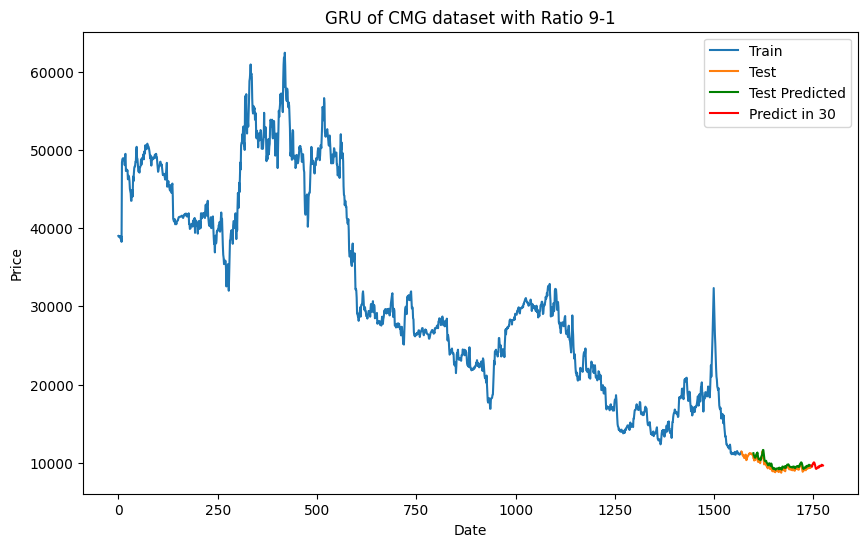

In [167]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('GRU of CMG dataset with Ratio 9-1')
plt.legend()
plt.show()

In [168]:
# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)
y_test=y_test.reshape(-1,1)
y_test
y_test= scaler.inverse_transform(y_test)
y_test
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error
# Tính MAE cho testing
mae_test = mean_absolute_error(y_test, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test, y_test_predicted, squared=False)

5/5 [==============================] - 0s 6ms/step


In [169]:

print('---------TEST----------')

print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))

#print("MSLE:", round(msle_test,3))
print('-------------------')

---------TEST----------
MAPE: 0.034
MAE: 322.513
RMSE: 373.479
-------------------
